<h1>Skills to the Limit - The future potential of players based on soccer skills data science experience with predictions</h1><br>
<h2>Jack Carroll (T00194823)</h2><br>
Based on Kaggle Dataset for FIFA 20 Players in the Career Mode of the game along with previous iterations of those players in FIFA 15 and FIFA 20.

<h1>Main Task</h1>

To predict what potential that the players have in terms of soccer skills / characteristics, if they have improved on their potential or becoe weaker in traits needed for soccer and how that potential has evolved from 2015 (FIFA 15) up to now (FIFA 20) with FIFAs 15 and 20 being used for the data project.

<h1>Description</h1>

The FIFA games are among the best-selling games of a particular year whenever the games are released.<br>
In Career Mode, a player can be chosen or a custom player can be created to advance through a season in soccer.<br><br>
When it comes to soccer players, each player has different characteristics where they can be weak or strong at dribbling the ball, sprinting or shooting the ball into the goals.<br><br>
For this challenge, analysis would be made of the improvements made in fulfilling their own potential in soccer by practicing certain skills for soccer like defneding the ball and shooting the ball for example from FIFA 15 up to FIFA 20.<br>
Machine learning would be used to predict what has changed for the players overtime with their potential and what is the the most valuable potential rating overall over the five year span from FIFA 15 to FIFA 20.

A series of datasets are used which shows the data of all players featured in the FIFA games spanning from FIFA 15 to FIFA 20 in a five year gap where the players in FIFA 20 can be compared to the same players from a previous iteration of the FIFA games which in this case would be FIFA 15.<br><br> The player attributes are among the main focus for predicting the potential rating of a player based on the most valuable skills needed by a player in 2020 (FIFA 20) when determining the potential based on the data contained within all of the players and the various strengths and weaknesses that each player has when shooting a ball with such power or for fast a player can run and how strong the control of the ball is for a player.<br><br> It would be important to predict the potential of the players in FIFA 20 based on the top 5 players or the first five players in the testing data  within the current iteration of FIFA games and train the 2015 data with the 2020 test data for FIFA 15 and FIFA 20 respectively to see if the skills and features in FIFA 15 make a direct impact on improving the expected potential of a player in 2020.<br><br> This is to see what difference a five year gap makes between the improved / weaker skills when a player acquires these skills over the years and see what the potential of the top five players might be like in 2020.

The Python libraries are shown below which are needed for the dataset project. Also, the XGBoost module must be installed as this is the model used for predicting the potential rankings of the top five players in FIFA 20 and to predict the potential of the first five players within FIFA 15 to show the impact of the core soccer skills on the players over a five year period from 2015 to 2020.

In [2]:
!pip install xgboost

     |████████████████████████████████| 109.8MB 4.2kB/s eta 0:00:01    |███▉                            | 13.0MB 3.4MB/s eta 0:00:29                      | 19.8MB 2.4MB/s eta 0:00:39     |██████████                      | 34.3MB 3.4MB/s eta 0:00:23     |██████████▊                     | 36.8MB 3.4MB/s eta 0:00:22:00:09     |█████████████████████████▊      | 88.2MB 3.0MB/s eta 0:00:08     |███████████████████████████     | 92.3MB 3.0MB/s eta 0:00:06
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

#Handling Table Data
import pandas as pd
import numpy as np


# Modelling Helpers
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, Normalizer, Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

#Modelling Algorithms
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#Plotting
import matplotlib as plot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



#plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

from statistics import median
from xgboost import XGBRegressor

In [4]:
sns.set_style(style='darkgrid')
sns.set_context(context='poster',font_scale=0.5)
sns.set_palette(sns.color_palette(("muted")))

Seven CSV files are included in the latest version of the FIFA 20 complete dataset. The library code to show the list of datasets along with the listing of the csv files in the library are shown below.

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!ls  ~/library

<h1>Loading Data</h1>

In [5]:
fifa_15 = pd.read_csv("~/library/players_15.csv")
fifa_20 = pd.read_csv("~/library/players_20.csv")
#fifa_20 = pd.read_csv("/kaggle/input/fifa-20-complete-player-dataset/players_20.csv")

In [6]:
fifa_15.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

The CSV files are loaded into a Data Frame for further exploration of the data shown below this point.

In [7]:
df = (fifa_15, fifa_20)

In [8]:
master_data = pd.concat(df, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [9]:
master_data.shape

(33743, 104)

In [10]:
columns = master_data.columns.to_frame()
columns

,0
sofifa_id,sofifa_id
player_url,player_url
short_name,short_name
long_name,long_name
age,age
dob,dob
height_cm,height_cm
weight_kg,weight_kg
nationality,nationality
club,club


<h1>FIFA 20 - Head Data</h1>

In [11]:
fifa_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [12]:
fifa_20.gk_kicking

0         NaN
1         NaN
2         NaN
3        78.0
4         NaN
5         NaN
6        88.0
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13       85.0
14       81.0
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25       93.0
26        NaN
27        NaN
28       72.0
29        NaN
         ... 
18248     NaN
18249     NaN
18250     NaN
18251    45.0
18252     NaN
18253     NaN
18254     NaN
18255     NaN
18256     NaN
18257     NaN
18258     NaN
18259    48.0
18260     NaN
18261     NaN
18262     NaN
18263     NaN
18264     NaN
18265     NaN
18266     NaN
18267     NaN
18268     NaN
18269     NaN
18270     NaN
18271     NaN
18272    46.0
18273     NaN
18274     NaN
18275     NaN
18276     NaN
18277     NaN
Name: gk_kicking, Length: 18278, dtype: float64

<h1>FIFA 15 - Head Data</h1>

In [13]:
fifa_15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
fifa_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15465 entries, 0 to 15464
Columns: 104 entries, sofifa_id to rb
dtypes: float64(17), int64(11), object(76)
memory usage: 12.3+ MB


<h2>Null Analysis for FIFA 15</h2>

In [15]:
fifa_15.isnull().any()

sofifa_id                   False
player_url                  False
short_name                  False
long_name                   False
age                         False
dob                         False
height_cm                   False
weight_kg                   False
nationality                 False
club                        False
overall                     False
potential                   False
value_eur                   False
wage_eur                    False
player_positions            False
preferred_foot              False
international_reputation    False
weak_foot                   False
skill_moves                 False
work_rate                   False
body_type                   False
real_face                   False
release_clause_eur           True
player_tags                  True
team_position                True
team_jersey_number           True
loaned_from                  True
joined                       True
contract_valid_until         True
nation_positio

In [16]:
null_columns = fifa_20.isnull().sum() > 0
null_columns

sofifa_id                   False
player_url                  False
short_name                  False
long_name                   False
age                         False
dob                         False
height_cm                   False
weight_kg                   False
nationality                 False
club                        False
overall                     False
potential                   False
value_eur                   False
wage_eur                    False
player_positions            False
preferred_foot              False
international_reputation    False
weak_foot                   False
skill_moves                 False
work_rate                   False
body_type                   False
real_face                   False
release_clause_eur           True
player_tags                  True
team_position                True
team_jersey_number           True
loaned_from                  True
joined                       True
contract_valid_until         True
nation_positio

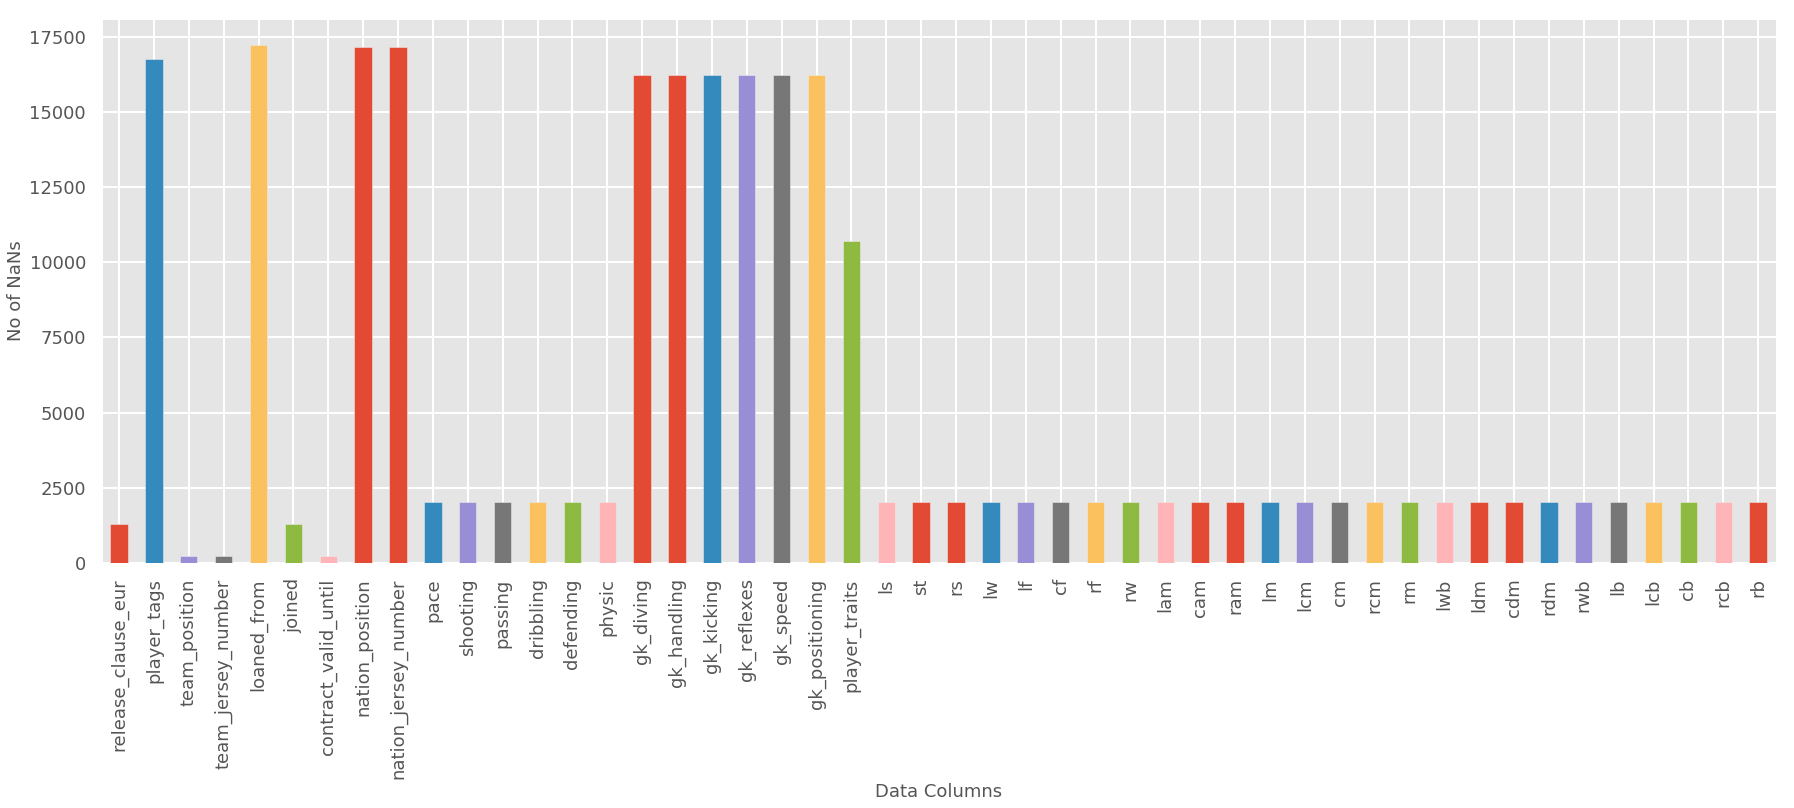

In [230]:
null_columns = fifa_20.isnull().sum() > 0
fifa_20.isnull().sum()[null_columns].plot.bar(figsize = (30, 10))

plt.xlabel('Data Columns', fontsize=18), plt.xticks(fontsize=18)
plt.ylabel('No of NaNs', fontsize=18), plt.yticks(fontsize=18)
plt.show()

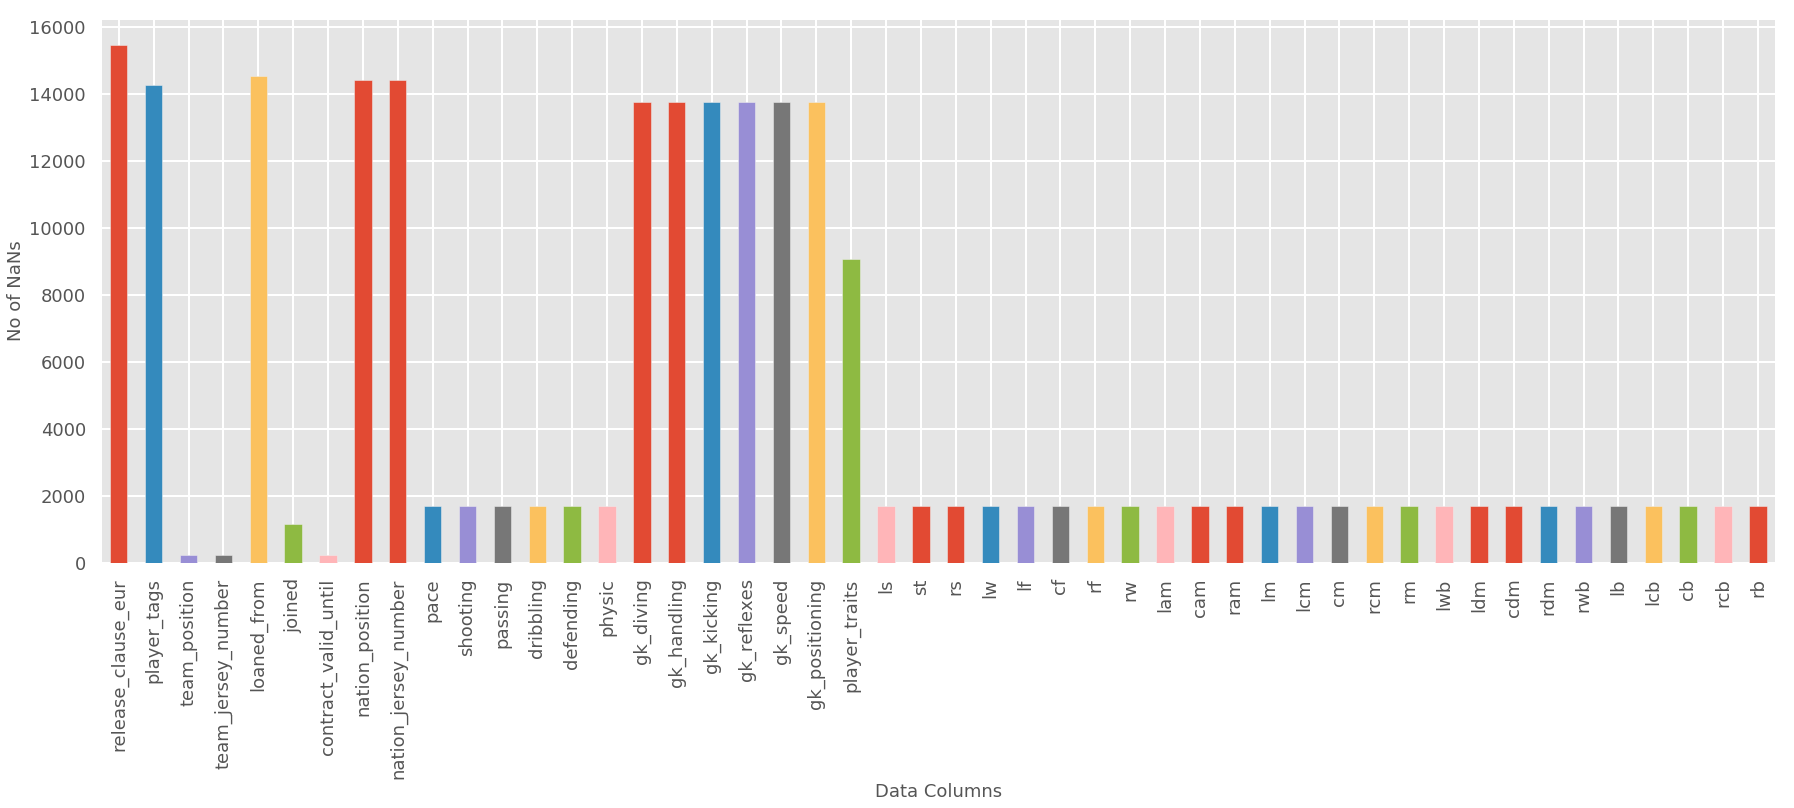

In [231]:
null_columns = fifa_20.isnull().sum() > 0
fifa_15.isnull().sum()[null_columns].plot.bar(figsize = (30, 10))

plt.xlabel('Data Columns', fontsize=18), plt.xticks(fontsize=18)
plt.ylabel('No of NaNs', fontsize=18), plt.yticks(fontsize=18)
plt.show()

<h1>FIFA 15 and FIFA 20 shapes</h1>

In [17]:
fifa_15.shape

(15465, 104)

In [18]:
fifa_20.shape

(18278, 104)

In [19]:
fifa_20.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [20]:
name_short = fifa_20[['short_name']]
rating = fifa_20[['potential']]
overall = fifa_20[['overall']]
pace = fifa_20[['pace']]
shooting = fifa_20[['shooting']]
passing = fifa_20[['passing']]
dribbling = fifa_20[['dribbling']]
defending = fifa_20[['defending']]
skill_moves = fifa_20[['skill_moves']]

In [21]:
data_frame = pd.concat([name_short,rating,overall,pace,shooting,passing,dribbling,defending,skill_moves],axis = 1)
data_frame.head()

,short_name,potential,overall,pace,shooting,passing,dribbling,defending,skill_moves
0,L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,4
1,Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,5
2,Neymar Jr,92,92,91.0,85.0,87.0,95.0,32.0,5
3,J. Oblak,93,91,NaN,NaN,NaN,NaN,NaN,1
4,E. Hazard,91,91,91.0,83.0,86.0,94.0,35.0,4


In [22]:
data_frame.describe()

,potential,overall,pace,shooting,passing,dribbling,defending,skill_moves
count,18278.000000,18278.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,18278.000000
mean,71.546887,66.244994,67.700899,52.298301,57.233777,62.531585,51.553503,2.368038
std,6.139669,6.949953,11.297656,14.029418,10.407844,10.284950,16.419528,0.765038
min,49.000000,48.000000,24.000000,15.000000,24.000000,23.000000,15.000000,1.000000
25%,67.000000,62.000000,61.000000,42.000000,50.000000,57.000000,36.000000,2.000000
50%,71.000000,66.000000,69.000000,54.000000,58.000000,64.000000,56.000000,2.000000
75%,75.000000,71.000000,75.000000,63.000000,64.000000,69.000000,65.000000,3.000000
max,95.000000,94.000000,96.000000,93.000000,92.000000,96.000000,90.000000,5.000000


In [23]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 9 columns):
short_name     18278 non-null object
potential      18278 non-null int64
overall        18278 non-null int64
pace           16242 non-null float64
shooting       16242 non-null float64
passing        16242 non-null float64
dribbling      16242 non-null float64
defending      16242 non-null float64
skill_moves    18278 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fifa_20.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [25]:
fifa_20['shooting'].unique()

array([92., 93., 85., nan, 83., 86., 60., 76., 84., 28., 91., 65., 46.,
       90., 68., 89., 87., 62., 82., 81., 79., 61., 74., 48., 80., 88.,
       50., 72., 54., 63., 58., 55., 69., 41., 77., 64., 45., 42., 78.,
       25., 73., 47., 75., 66., 71., 51., 40., 27., 36., 57., 37., 53.,
       49., 70., 59., 67., 43., 39., 35., 52., 33., 38., 44., 30., 31.,
       34., 32., 56., 29., 22., 23., 20., 24., 26., 18., 16., 15., 19.,
       21., 17.])

In [27]:
series = data_frame['potential']
print(type(series))
dataframe = data_frame[['potential']]
print(type(dataframe))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
fifa_20.physic

0        66.0
1        78.0
2        58.0
3         NaN
4        66.0
5        78.0
6         NaN
7        86.0
8        66.0
9        74.0
10       75.0
11       87.0
12       83.0
13        NaN
14        NaN
15       83.0
16       82.0
17       74.0
18       85.0
19       84.0
20       82.0
21       80.0
22       72.0
23       64.0
24       86.0
25        NaN
26       57.0
27       63.0
28        NaN
29       80.0
30        NaN
31        NaN
32        NaN
33       57.0
34       83.0
35       83.0
36       69.0
37       66.0
38       69.0
39       74.0
40       82.0
41       67.0
42       89.0
43       68.0
44       79.0
45       78.0
46       77.0
47       79.0
48       53.0
49       76.0
50       79.0
51       73.0
52       63.0
53        NaN
54       47.0
55       70.0
56       77.0
57       82.0
58       66.0
59       82.0
60        NaN
61       78.0
62       60.0
63       78.0
64       70.0
65       67.0
66       68.0
67       79.0
68       64.0
69       69.0
70       71.0
71    

In [29]:
#filtering datas
filterer = data_frame['overall'] > 89
data_frame3 = data_frame[filterer]

In [30]:
data_frame3

,short_name,potential,overall,pace,shooting,passing,dribbling,defending,skill_moves
0,L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,4
1,Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,5
2,Neymar Jr,92,92,91.0,85.0,87.0,95.0,32.0,5
3,J. Oblak,93,91,NaN,NaN,NaN,NaN,NaN,1
4,E. Hazard,91,91,91.0,83.0,86.0,94.0,35.0,4
5,K. De Bruyne,91,91,76.0,86.0,92.0,86.0,61.0,4
6,M. ter Stegen,93,90,NaN,NaN,NaN,NaN,NaN,1
7,V. van Dijk,91,90,77.0,60.0,70.0,71.0,90.0,2
8,L. Modrić,90,90,74.0,76.0,89.0,89.0,72.0,4
9,M. Salah,90,90,93.0,86.0,81.0,89.0,45.0,4


<h1>Visualizing the Data</h1>

<h1>FIFA 15 and FIFA 20 Attributes Comparisons based on the number of players</h1>

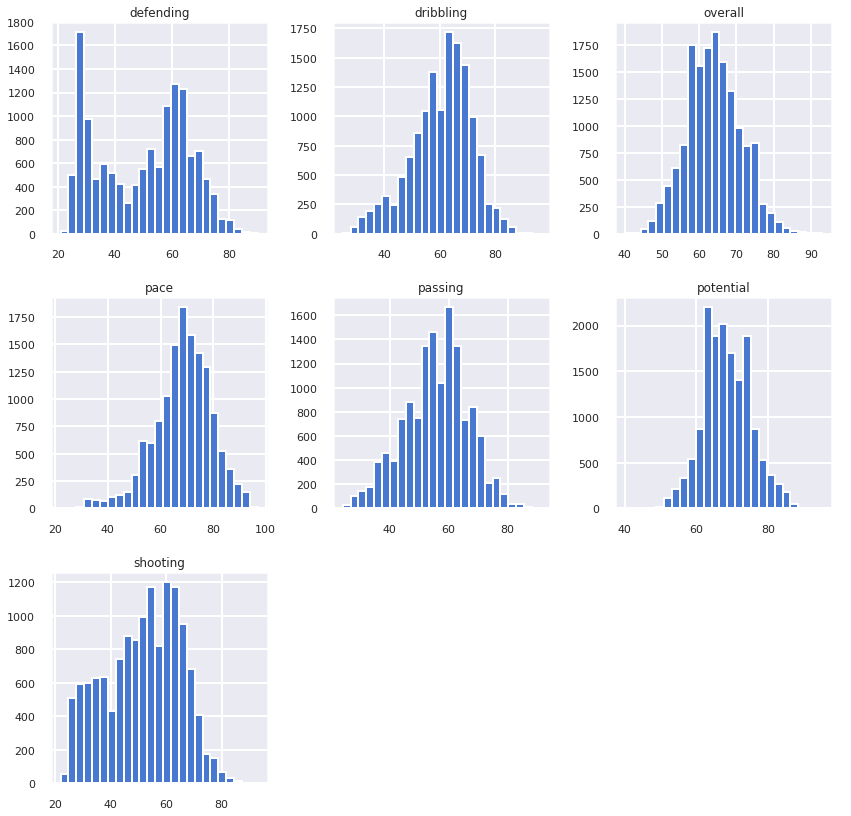

In [31]:
dist_subset = fifa_15[["overall", "potential", "defending", "shooting", "pace", "dribbling", "passing"]]

dist_subset.hist(bins=25, figsize=(14,14))
plt.show()

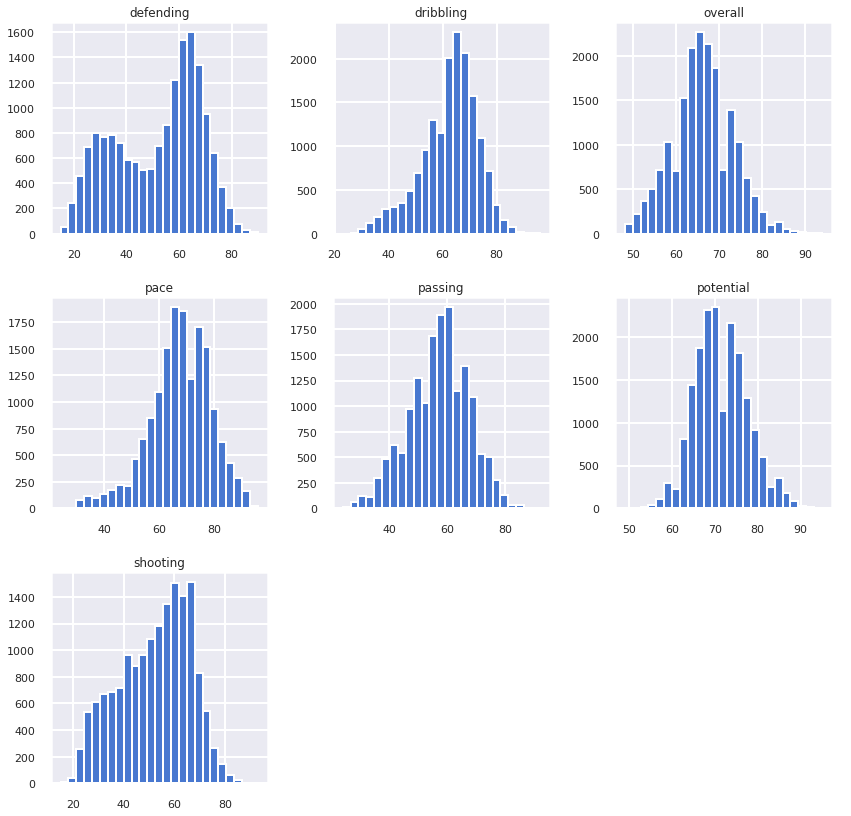

In [32]:
distant_subset = fifa_20[["overall", "potential", "defending", "shooting", "pace", "dribbling", "passing"]]

distant_subset.hist(bins=25, figsize=(14,14))
plt.show()

<h1>Line Plots of shooting and defending abilities based on the age of players. (Use this as last running graph)</h1>

In [217]:
df20_shoot = fifa_20[(fifa_20.age.astype(int) >= 18) & (fifa_20.age.astype(int) <= 35)].groupby(['age'])['shooting'].mean()
df20_defend = fifa_20[(fifa_20.age.astype(int) >= 18) & (fifa_20.age.astype(int) <= 35)].groupby(['age'])['defending'].mean()
df20_summary = pd.concat([df20_shoot, df20_defend], axis=1)

In [218]:
df15_shoot = fifa_15[(fifa_15.age.astype(int) >= 18) & (fifa_15.age.astype(int) <= 35)].groupby(['age'])['shooting'].mean()
df15_defend = fifa_15[(fifa_15.age.astype(int) >= 18) & (fifa_15.age.astype(int) <= 35)].groupby(['age'])['defending'].mean()
df15_summary = pd.concat([df15_shoot, df15_defend], axis=1)

In [228]:
df15_defend.values

array([41.32677761, 44.19840365, 45.98180077, 47.38511029, 48.55426009,
       48.51351351, 50.07972441, 51.39122137, 51.44320487, 52.83296703,
       53.67938931, 54.83646889, 54.6597582 , 54.63958333, 55.84473684,
       57.23642173, 56.52336449, 55.94392523])

In [227]:
df15_shoot.values

array([44.83207262, 46.52337514, 47.62739464, 49.53676471, 50.74618834,
       52.24231128, 52.57972441, 53.08683206, 54.18458418, 53.95934066,
       54.86005089, 54.8683068 , 54.75647668, 54.01041667, 55.34210526,
       54.76357827, 53.57943925, 53.96261682])

In [225]:
df20_defend.values

array([40.46409807, 43.70723684, 45.62989324, 48.39633174, 49.89346812,
       51.16142384, 51.21988206, 53.00503778, 52.69136879, 54.10846343,
       54.21058091, 55.68708241, 56.90359897, 56.25138889, 56.77470356,
       58.46428571, 59.31707317, 57.82730924])

In [226]:
df20_shoot.values

array([45.23117338, 46.36513158, 47.26957295, 48.52870813, 49.75660964,
       51.51986755, 53.39764111, 53.65323258, 54.76373147, 54.6400986 ,
       55.54253112, 55.38418708, 54.78791774, 56.575     , 56.66798419,
       55.95918367, 55.80894309, 56.48192771])

The two graphs below show the average defending / shooting by the ages of the players in FIFAs 15 and 20 where the blue lines represent the defending abilities and the red line represents the shooting abilities. The FIFA 20 graph shows that the abilities to defend the ball and to attack in the beautiful game of soccer has improved over a five year gap when the style of soccer was different as in 2015, the graph shows how the defending and shooting abilities were weaker five years ago when the game had less substance and style for perfecting skills in soccer. In 2020 according to the FIFA 20 graph below, the style of soccer has drastically changed where there seems to be more aggression and substance in using the core abilities of soccer to make games more dramatic and aggressive.

Text(0.5, 1.0, 'FIFA 15 - Average Defending / Shooting by Age')

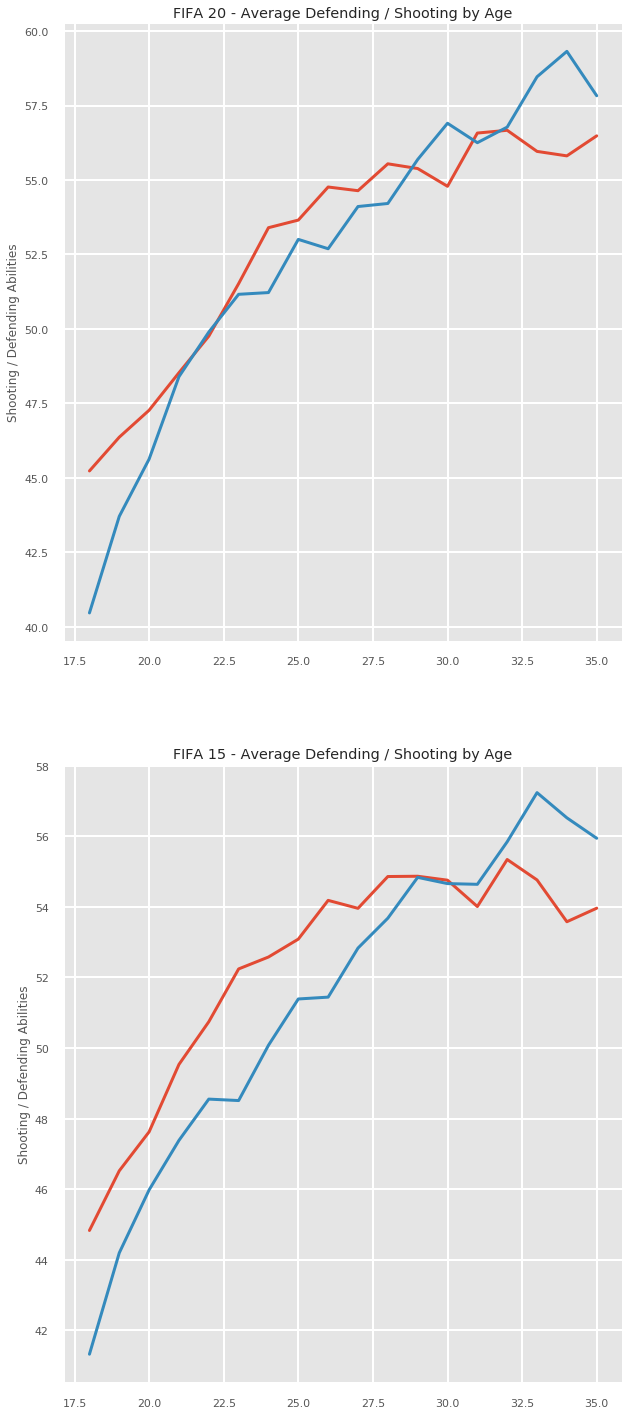

In [219]:
fig,(ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 25))
ax1.plot(df20_summary)
ax1.set_ylabel('Shooting / Defending Abilities')
ax1.set_title('FIFA 20 - Average Defending / Shooting by Age')
ax2.plot(df15_summary)
ax2.set_ylabel('Shooting / Defending Abilities')
ax2.set_title('FIFA 15 - Average Defending / Shooting by Age')

In [33]:
df2 = fifa_20[['short_name','age','height_cm','weight_kg','nationality','club',
 'overall','potential','value_eur','wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle']]

In [34]:
# dropping uninteresting columns that won't be used later on
df2.drop(['loaned_from'], 1, inplace=True)

In [35]:
df2.drop(['player_tags'], 1, inplace=True)

In [36]:
df2.drop(['height_cm', 'weight_kg'], 1, inplace=True)

In [37]:
df2.fillna(0, inplace=True)

In [38]:
print('Length of dataset:', len(df2))

Length of dataset: 18278


In [39]:
df2[(df2['power_shot_power'] > 80) & (df2['overall'] > 88)]

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22
5,K. De Bruyne,28,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,166500000.0,RCM,17.0,2015-08-30,2023.0,RCM,7.0,76.0,86.0,92.0,86.0,61.0,78.0,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51
7,V. van Dijk,27,Netherlands,Liverpool,90,91,78000000,200000,CB,Right,3,3,2,Medium/Medium,Normal,Yes,150200000.0,LCB,4.0,2018-01-01,2023.0,LCB,4.0,77.0,60.0,70.0,71.0,90.0,86.0,"Diver, Avoids Using Weaker Foot, Leadership, L...",53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85
10,K. Mbappé,20,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,RW,7.0,2018-07-01,2022.0,RM,10.0,96.0,84.0,78.0,90.0,39.0,75.0,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32
12,H. Kane,25,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,High/High,Normal,Yes,159800000.0,ST,10.0,2010-07-01,2024.0,ST,9.0,70.0,91.0,79.0,81.0,47.0,83.0,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38
17,S. Agüero,31,Argentina,Manchester City,89,89,60000000,300000,ST,Right,4,4,4,High/Medium,Stocky,Yes,111000000.0,ST,10.0,2011-07-28,2021.0,ST,9.0,80.0,90.0,77.0,88.0,33.0,74.0,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24
19,L. Suárez,32,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,High/Medium,Normal,Yes,108700000.0,ST,9.0,2014-07-11,2021.0,0,0.0,73.0,89.0,80.0,84.0,51.0,84.0,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38
20,R. Lewandowski,30,Poland,FC Bayern München,89,89,64500000,235000,ST,Right,4,4,4,High/Medium,Normal,Yes,106400000.0,ST,9.0,2014-07-01,2021.0,LS,9.0,77.0,87.0,74.0,85.0,41.0,82.0,"Diver, Beat Offside Trap, Speed Dribbler (CPU ...",62,88,85,82,88,85,77,8

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 59 columns):
short_name                    18278 non-null object
age                           18278 non-null int64
nationality                   18278 non-null object
club                          18278 non-null object
overall                       18278 non-null int64
potential                     18278 non-null int64
value_eur                     18278 non-null int64
wage_eur                      18278 non-null int64
player_positions              18278 non-null object
preferred_foot                18278 non-null object
international_reputation      18278 non-null int64
weak_foot                     18278 non-null int64
skill_moves                   18278 non-null int64
work_rate                     18278 non-null object
body_type                     18278 non-null object
real_face                     18278 non-null object
release_clause_eur            18278 non-null float64
team_position 

In [41]:
df2.describe()

,age,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.404059e+06,19.839917,1994.576267,0.746307,60.159645,46.472754,50.858464,55.566145,45.810920,57.650016,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,4.656964,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.070065e+07,16.652277,230.080966,3.358197,23.814336,21.110257,20.506407,21.933090,22.419982,22.389483,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,16.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,22.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,4.350000e+05,8.000000,2020.000000,0.000000,57.000000,35.000000,46.000000,53.000000,31.000000,55.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.100000e+06,17.000000,2021.000000,0.000000,67.000000,52.000000,56.000000,62.000000,52.000000,64.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,29.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,3.200000e+06,27.000000,2022.000000,0.000000,74.000000,62.000000,63.000000,69.000000,64.000000,71.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68

<h2>Line Plot for Power Jumping attibute stats based on overall rankings of players in FIFA 20.</h2>

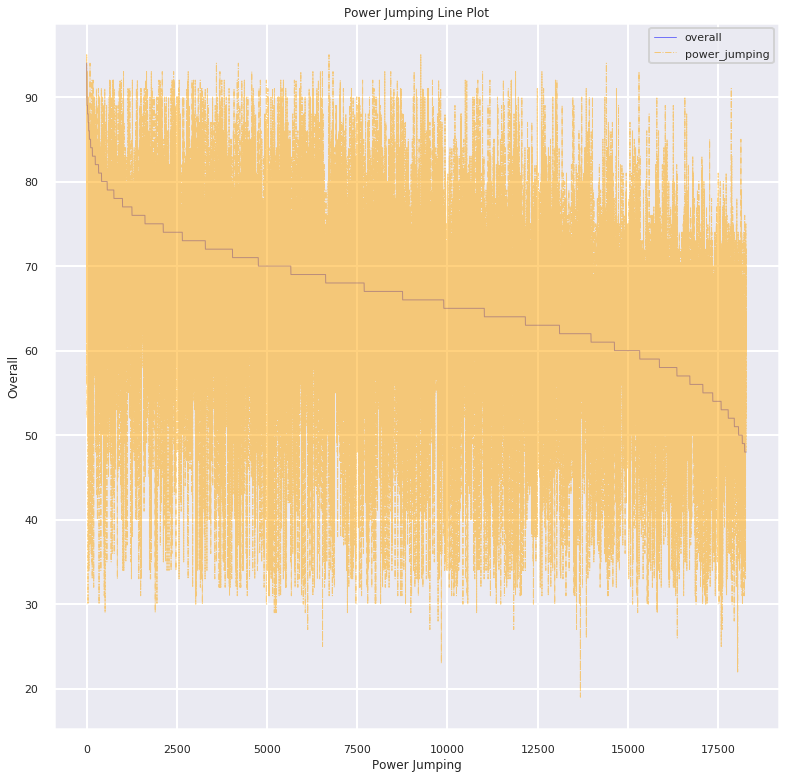

In [42]:
df2.overall.plot(kind = 'line',color = 'blue',label = 'overall',lw = 1,alpha = 0.5, grid = True,figsize = (13,13))
df2.power_jumping.plot(color = 'orange',label='power_jumping',lw = 1,alpha = 0.5,grid=True,ls = '-.')
plt.legend(loc = 'upper right')
plt.ylabel("Overall")
plt.xlabel("Power Jumping")
plt.title('Power Jumping Line Plot')
plt.show()

<h2>Viewing the ability of the players in FIFA 20 to pass the ball based on the pace and physicality of the player.</h2>

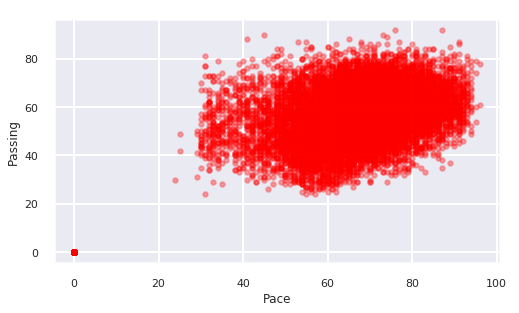

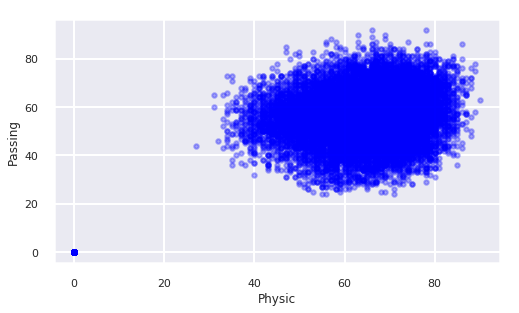

In [43]:
df2.plot(kind = 'scatter',x = 'pace',y = 'passing',color = 'red',alpha = 0.3,grid = True,figsize = (8,4.5))
plt.ylabel('Passing')
plt.xlabel('Pace')
df2.plot(kind = 'scatter',x = 'physic',y = 'passing',color = 'blue',alpha = 0.3,grid = True,figsize = (8,4.5))
plt.ylabel('Passing')
plt.xlabel('Physic')
plt.show()

<h1>The number of players in FIFA 20 based on the ratings of these players.</h1>

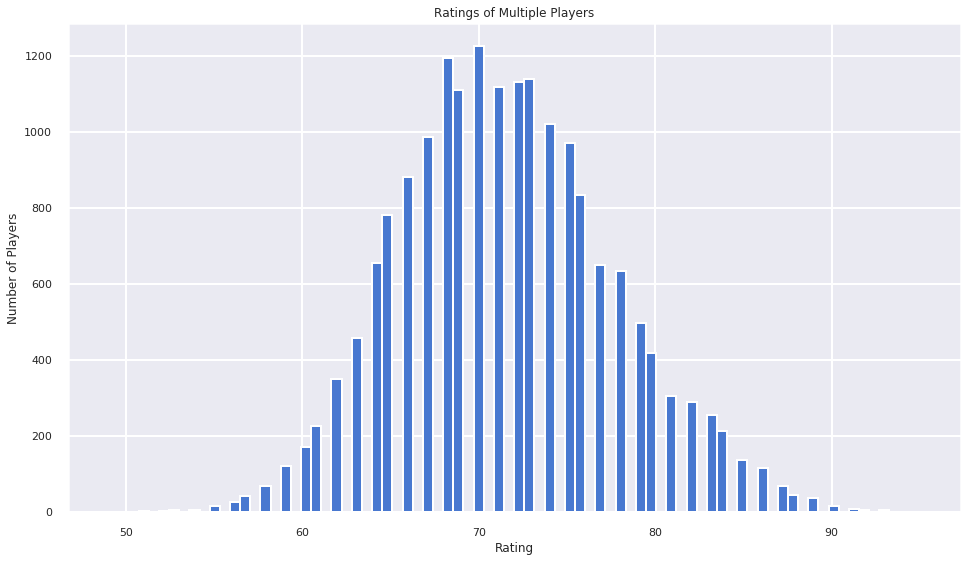

In [44]:
#age Histogram
df2.potential.plot(kind = 'hist',bins = 80,figsize = (16,9))
plt.title("Ratings of Multiple Players")
plt.xlabel("Rating")
plt.ylabel("Number of Players")
plt.show()

<h1>The preferred foot of all the players in FIFA 20.</h1>

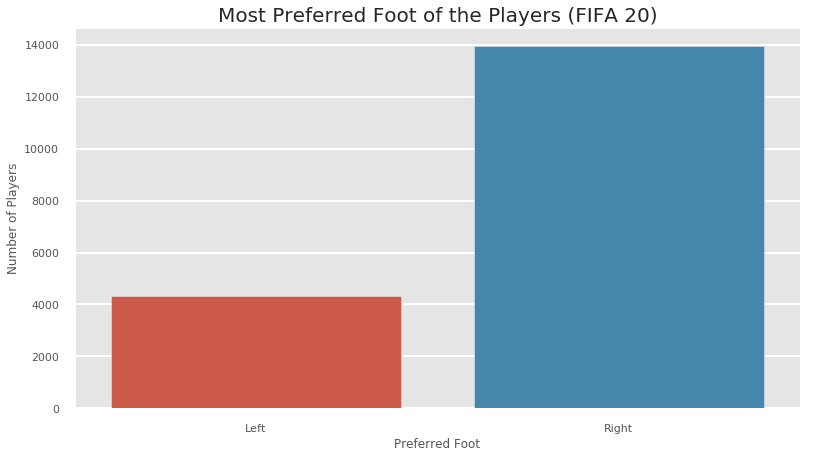

In [45]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(df2['preferred_foot'])
plt.title('Most Preferred Foot of the Players (FIFA 20)', fontsize = 20)
plt.xlabel("Preferred Foot")
plt.ylabel("Number of Players")
plt.show()

<h1>FIFA 20 Players with the highest power for taking long shots</h1>

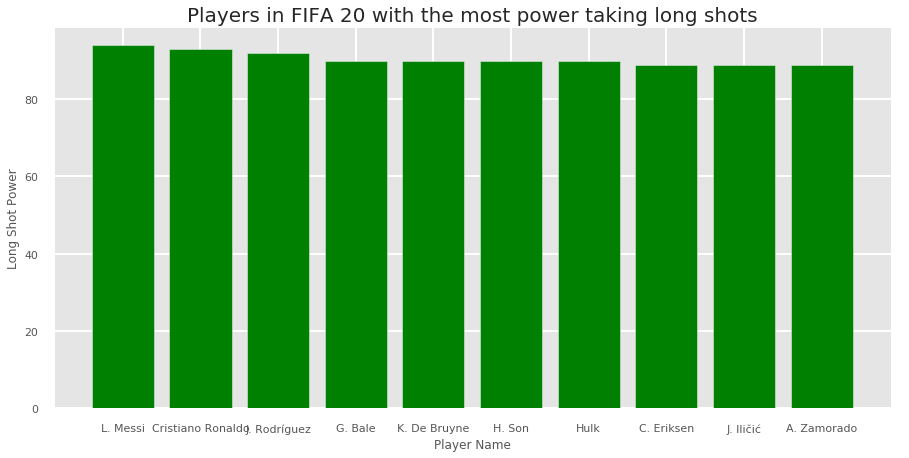

In [46]:
plt.figure(figsize=(15, 7))

long_shot_power = df2.sort_values(by=['power_long_shots'], ascending=False).head(10)

plt.bar(long_shot_power["short_name"],long_shot_power["power_long_shots"],color="g")
#p.head().plot(kind="bar")

plt.xlabel("Player Name")
plt.ylabel("Long Shot Power")
plt.title("Players in FIFA 20 with the most power taking long shots", fontsize = 20)
plt.show()

<h1>Histogram of the Distribution of sprint speed among the number of players in FIFA 20</h1>

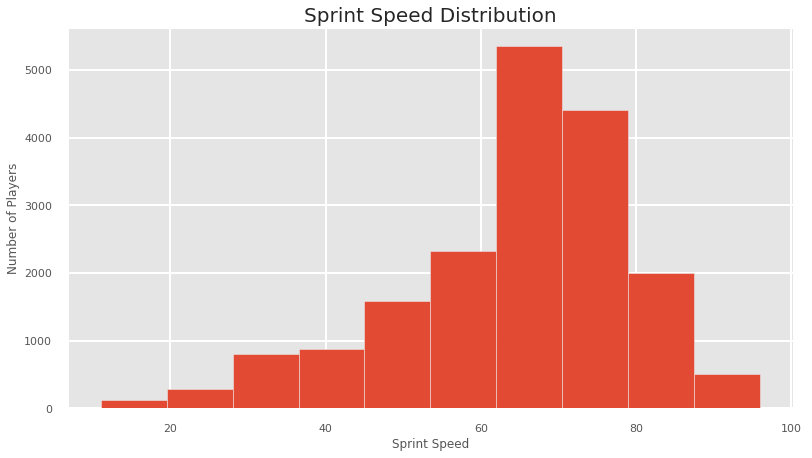

In [47]:
df2["movement_sprint_speed"].plot(kind="hist")

plt.title("Sprint Speed Distribution", fontsize = 20)
plt.xlabel("Sprint Speed")
plt.ylabel("Number of Players")
plt.show()

<h1>Histogram of all players with specific potential ratings in FIFA 20</h1>

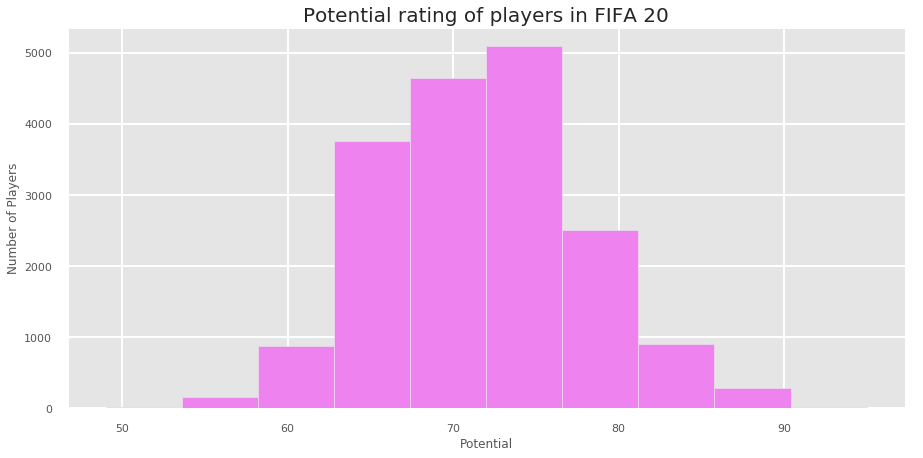

In [48]:
plt.figure(figsize=(15, 7))
df2["potential"].plot(kind="hist",color="violet")

#plt.tick_params(axis='x', rotation=70)

plt.title("Potential rating of players in FIFA 20", fontsize = 20)
plt.xlabel("Potential")
plt.ylabel("Number of Players")
plt.show()

<h1>Potential and Overall ratings of players in FIFA 20.</h1>

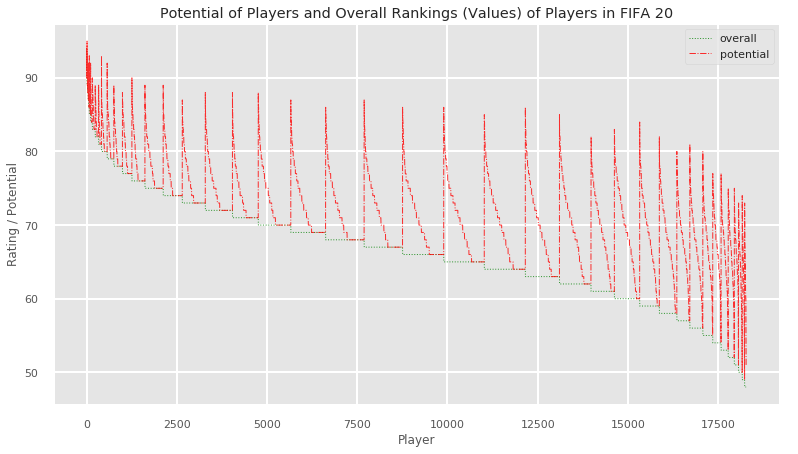

In [49]:
df2.overall.plot(kind = 'line',color = 'green',label = 'overall',linewidth = 1,alpha = 0.8, grid = True,linestyle = ':')
df2.potential.plot(color = 'red',label='potential',linewidth = 1,alpha = 0.8,grid=True,linestyle = '-.')
plt.legend(loc = 'upper right')    # legend = puts label into plot
plt.xlabel("Player")
plt.ylabel("Rating / Potential")
plt.title('Potential of Players and Overall Rankings (Values) of Players in FIFA 20')
plt.show()

<h1>Potential and Overall ratings of players in FIFA 15.</h1>

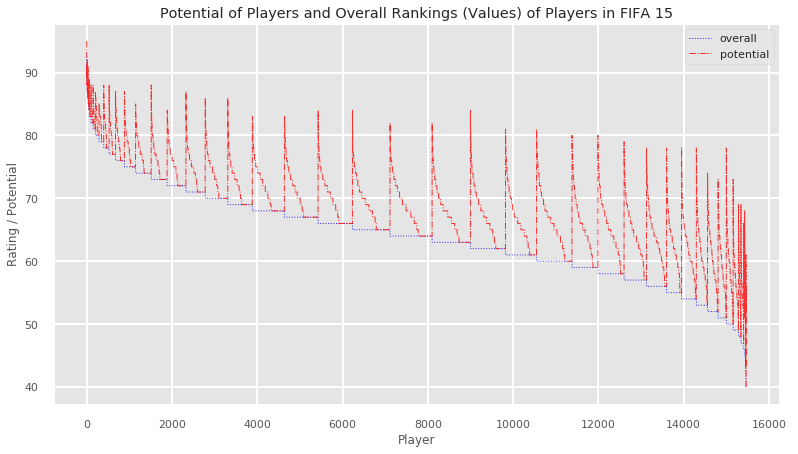

In [50]:
fifa_15.overall.plot(kind = 'line',color = 'blue',label = 'overall',linewidth = 1,alpha = 0.8, grid = True,linestyle = ':')
fifa_15.potential.plot(color = 'red',label='potential',linewidth = 1,alpha = 0.8,grid=True,linestyle = '-.')
plt.legend(loc = 'upper right')    # legend = puts label into plot
plt.xlabel("Player")
plt.ylabel("Rating / Potential")
plt.title('Potential of Players and Overall Rankings (Values) of Players in FIFA 15')
plt.show()

<h2>A scatter plot showing the players which displays their physicality and defensive skills</h2>

Text(0.5, 1.0, 'Physic Defense Scatter Plot - FIFA 20')

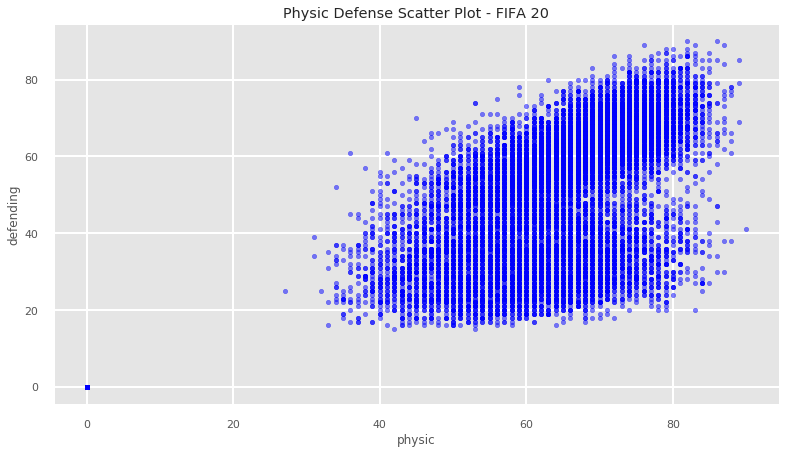

In [51]:
df2.plot(kind='scatter', x='physic', y='defending',alpha = 0.5,color = 'blue')           
plt.title('Physic Defense Scatter Plot - FIFA 20')

<h2>The dribbling abilities of players in FIFA 20.</h2>

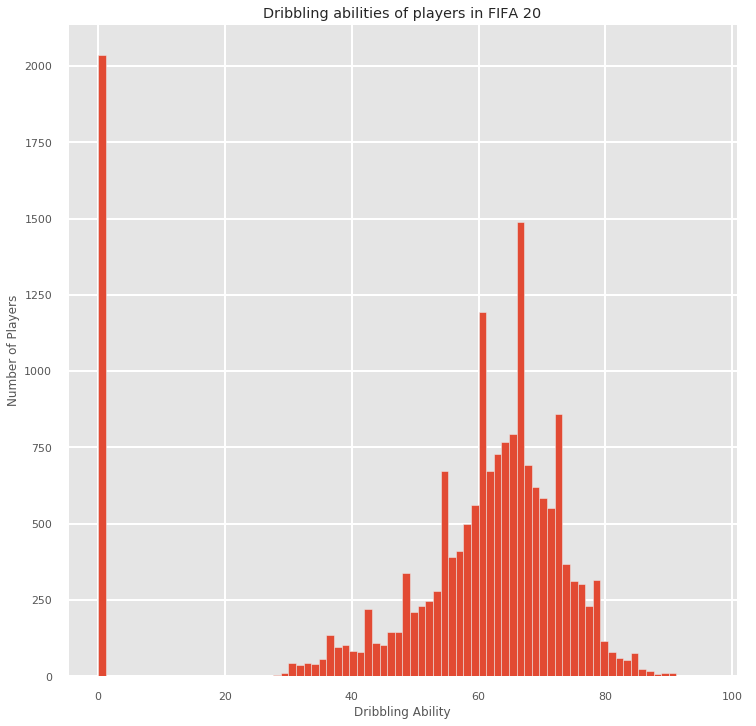

In [52]:
df2.dribbling.plot(kind = 'hist',bins = 80,figsize = (12,12))
plt.xlabel("Dribbling Ability")
plt.ylabel("Number of Players")
plt.title("Dribbling abilities of players in FIFA 20")
plt.show()

In [53]:
df2.dribbling.plot(kind = 'hist',bins = 50)
plt.clf()

<Figure size 936x504 with 0 Axes>

In [54]:
# 1 - Filtering Pandas data frame
x = df2['dribbling']>90 # it gives us the shooting values which  bigger than 85 
df2[x] # It prints the True values as table

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22
41,Bernardo Silva,24,Portugal,Manchester City,87,90,64000000,210000,"RW, CAM, CM",Left,2,3,4,High/High,Lean,Yes,123200000.0,RW,20.0,2017-07-01,2024.0,CAM,10.0,81.0,76.0,83.0,92.0,51.0,67.0,"Selfish, Finesse Shot, Crowd Favourite",85,78,51,86,69,92,84,67,74,92,85,78,94,85,92,74,51,93,54,75,69,49,85,85,68,87,49,59,40
48,D. Mertens,32,Belgium,Napoli,87,87,40000000,135000,"CF, ST",Right,3,4,4,High/Low,Normal,Yes,68000000.0,SUB,14.0,2013-07-01,2020.0,RF,14.0,88.0,83.0,80.0,91.0,35.0,53.0,"Beat Offside Trap, Selfish, Argues with Offici...",79,86,40,82,70,91,82,79,74,89,93,83,94,88,92,80,59,73,39,81,59,36,87,83,79,81,25,40,40
54,L. Insigne,28,Italy,Napoli,87,87,52000000,140000,"CF, LW, ST",Right,3,4,4,High/Medium,Normal,Yes,88400000.0,LS,24.0,2010-07-01,2022.0,LW,10.0,89.0,79.0,85.0,91.0,35.0,47.0,"Beat Offside Trap, Argues with Officials, Earl...",86,77,59,87,74,90,87,77,78,93,94,85,94,84,93,79,52,72,40,85,34,26,85,89,68,83,49,24,22
62,Isco,27,Spain,Real Madrid,86,87,51000000,245000,"CAM, CM, LW",Right,3,3,4,Medium/Low,Normal,Yes,108400000.0,SUB,22.0,2013-07-03,2022.0,LW,22.0,71.0,77.0,83.0,91.0,59.0,60.0,"Injury Free, Beat Offside Trap, Selfish, Fines...",78,79,55,84,67,92,88,76,80,93,74,68,85,76,90,69,61,62,59,84,58,61,79,87,76,86,58,64,51
150,Douglas Costa,28,Brazil,Juventus,84,84,31500000,155000,"LM, RW, LW",Left,3,3,5,High/Medium,Normal,Yes,52000000.0,SUB,11.0,2018-07-01,2022.0,0,0.0,94.0,73.0,79.0,91.0,43.0,61.0,"Selfish, Argues with Officials, Early Crosser",82,64,50,83,76,92,84,78,65,91,95,93,93,80,91,86,60,71,58,80,55,48,74,80,77,80,45,38,34


In [55]:
df2[(df2['age']<25) & (df2['overall']>85)]

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
10,K. Mbappé,20,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,RW,7.0,2018-07-01,2022.0,RM,10.0,96.0,84.0,78.0,90.0,39.0,75.0,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32
26,R. Sterling,24,England,Manchester City,88,90,73000000,255000,"RW, LW",Right,3,3,4,High/Medium,Lean,Yes,140500000.0,LW,7.0,2015-07-14,2023.0,LW,10.0,93.0,79.0,78.0,89.0,45.0,57.0,"Selfish, Early Crosser",78,83,38,84,67,89,75,63,69,88,96,91,94,89,94,76,57,79,54,77,38,30,91,79,69,79,47,53,47
41,Bernardo Silva,24,Portugal,Manchester City,87,90,64000000,210000,"RW, CAM, CM",Left,2,3,4,High/High,Lean,Yes,123200000.0,RW,20.0,2017-07-01,2024.0,CAM,10.0,81.0,76.0,83.0,92.0,51.0,67.0,"Selfish, Finesse Shot, Crowd Favourite",85,78,51,86,69,92,84,67,74,92,85,78,94,85,92,74,51,93,54,75,69,49,85,85,68,87,49,59,40
55,L. Sané,23,Germany,Manchester City,86,92,61000000,195000,LW,Left,2,3,4,High/Medium,Lean,Yes,125100000.0,SUB,19.0,2016-08-02,2021.0,LW,19.0,95.0,81.0,79.0,86.0,38.0,70.0,"Long Throw-in, Selfish, Early Crosser",83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35
57,M. Škriniar,24,Slovakia,Inter,86,90,52000000,89000,CB,Right,1,4,2,Medium/High,Normal,No,92300000.0,LCB,37.0,2017-07-07,2023.0,0,0.0,69.0,41.0,59.0,66.0,87.0,82.0,0,40,42,82,73,40,67,34,30,69,69,70,69,48,83,51,50,78,75,85,30,86,86,30,57,56,81,92,87,83
61,J. Kimmich,24,Germany,FC Bayern München,86,88,48000000,125000,"RB, CM, CDM",Right,3,4,3,High/Low,Lean,Yes,82800000.0,RB,32.0,2015-07-01,2023.0,CDM,6.0,72.0,69.0,86.0,84.0,79.0,78.0,0,91,66,74,87,67,83,85,61,85,85,77,68,84,87,84,76,79,94,66,71,86,80,80,84,44,85,78,80,79


<h1>Heat Map based on attributes in data frame in FIFA 20</h1>

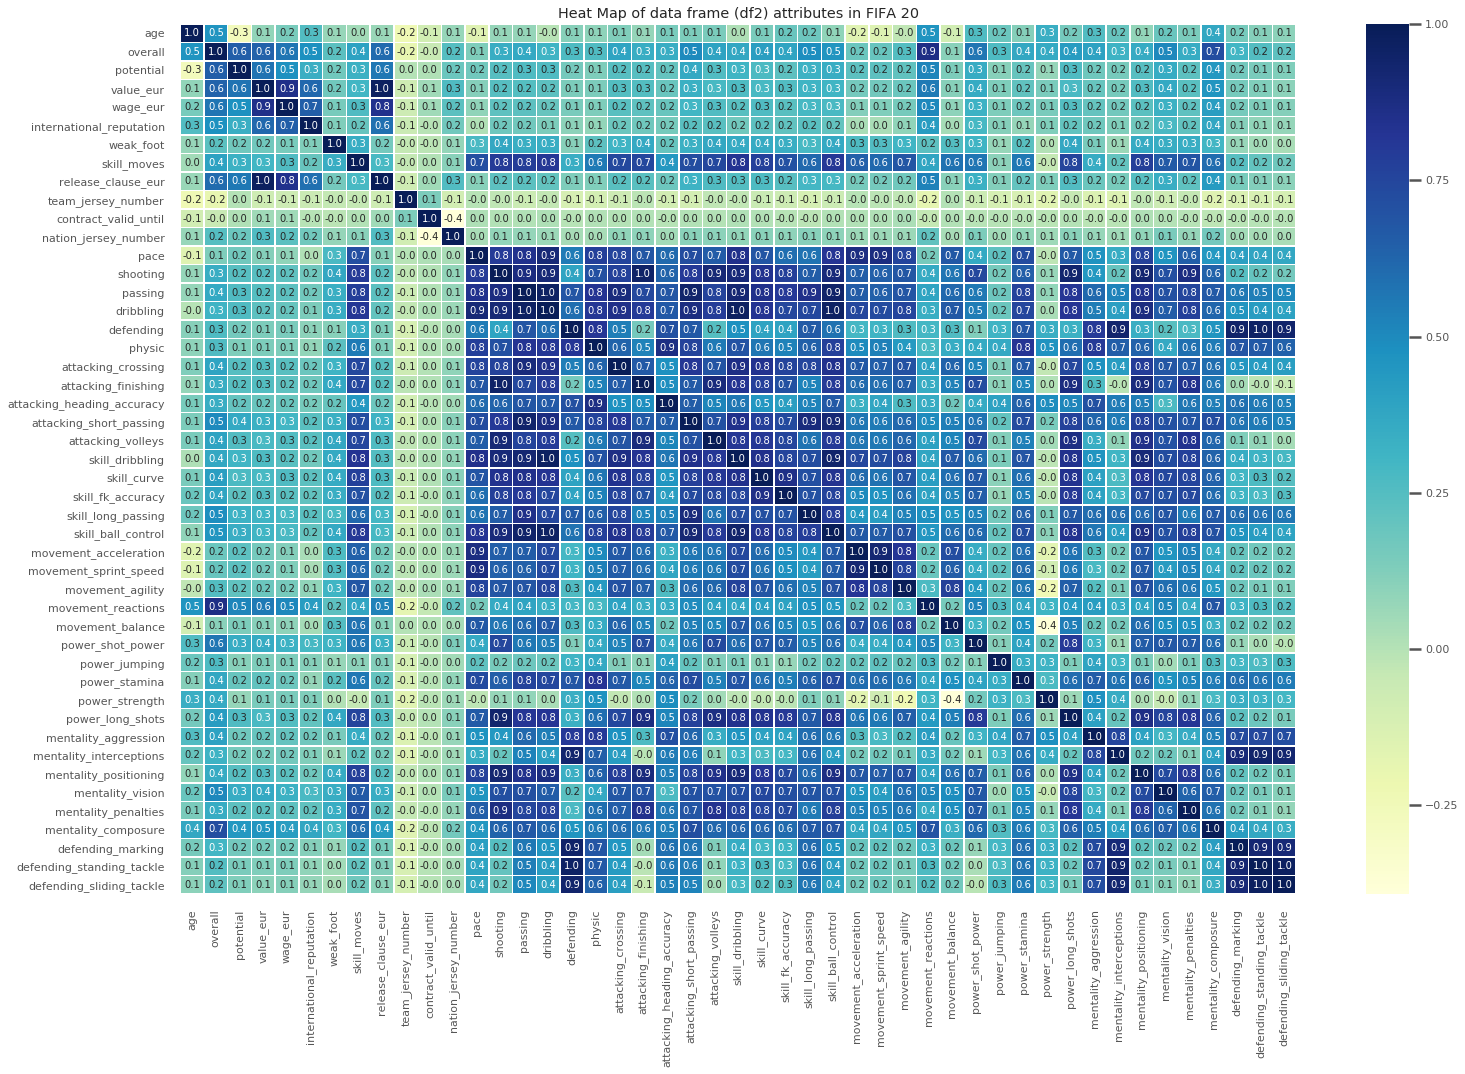

In [56]:
f,ax = plt.subplots(figsize = (25,16))
sns.heatmap(df2.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax,cmap='YlGnBu')
plt.title('Heat Map of data frame (df2) attributes in FIFA 20')
plt.show()

<h1>Heat Map based on all attributes and data in FIFA 15</h1>

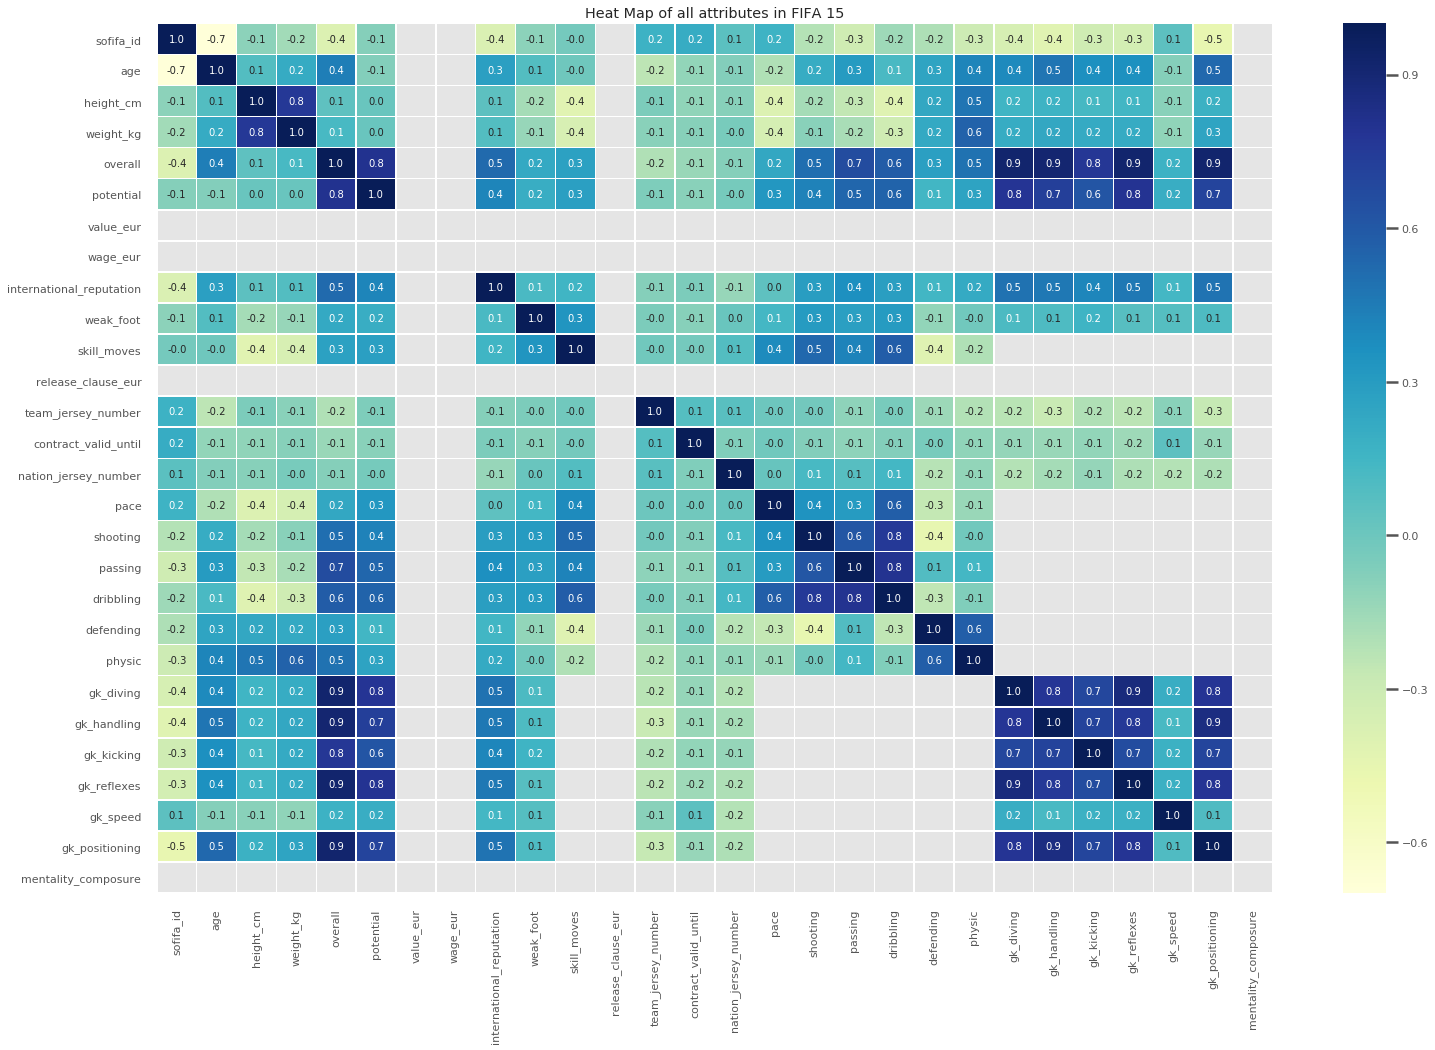

In [57]:
#Correlation map
f,ax = plt.subplots(figsize = (25,16))
sns.heatmap(fifa_15.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax,cmap='YlGnBu')
plt.title('Heat Map of all attributes in FIFA 15')
plt.show()

<h1>Testing and Training the Data</h1>

The data associated with goalkeepers will be excluded from this test as the data science project is meant to predict the potential scores for the top players in 2020(FIFA 20) based on the primary six skills needed as seen below in the code.

In [58]:
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [59]:
skills

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [60]:
label_data_frame = fifa_15.potential #Training data

In [61]:
label_data_frame

0        95
1        92
2        90
3        90
4        90
5        91
6        90
7        88
8        88
9        88
10       88
11       91
12       89
13       87
14       87
15       87
16       87
17       87
18       92
19       91
20       90
21       88
22       88
23       88
24       88
25       87
26       87
27       86
28       86
29       86
30       86
31       91
32       89
33       88
34       87
35       87
36       87
37       87
38       86
39       86
40       86
41       86
42       85
43       85
44       89
45       88
46       88
47       87
48       86
49       86
50       86
51       85
52       85
53       84
54       84
55       84
56       84
57       84
58       84
59       84
60       84
61       84
62       84
63       89
64       88
65       87
66       87
67       87
68       86
69       86
70       86
71       86
72       85
73       85
74       84
75       84
76       84
77       83
78       83
79       83
80       83
81       83
82       83
83  

In [62]:
fifa_20.potential

0        94
1        93
2        92
3        93
4        91
5        91
6        93
7        91
8        90
9        90
10       95
11       91
12       91
13       91
14       90
15       90
16       89
17       89
18       89
19       89
20       89
21       89
22       89
23       92
24       91
25       91
26       90
27       89
28       89
29       88
30       88
31       88
32       88
33       88
34       88
35       88
36       88
37       88
38       88
39       88
40       90
41       90
42       89
43       88
44       87
45       87
46       87
47       87
48       87
49       87
50       87
51       87
52       87
53       87
54       87
55       92
56       90
57       90
58       89
59       89
60       88
61       88
62       87
63       87
64       86
65       86
66       86
67       86
68       86
69       86
70       86
71       86
72       86
73       93
74       92
75       91
76       90
77       90
78       90
79       90
80       89
81       89
82       89
83  

In [63]:
fifa_15_skills = fifa_15[skills] #fifa 19 player features
fifa_20_skills = fifa_20[skills]

In [64]:
fifa_15_skills.shape

(15465, 6)

In [65]:
fifa_15_skills.columns

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], dtype='object')

In [215]:
fifa_15_skills.head()

,pace,shooting,passing,dribbling,defending,physic
0,93.0,89.0,86.0,96.0,27.0,63.0
1,93.0,93.0,81.0,91.0,32.0,79.0
2,93.0,86.0,83.0,92.0,32.0,64.0
3,76.0,91.0,81.0,86.0,34.0,86.0
4,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
fifa_20_skills.shape

(18278, 6)

In [67]:
fifa_20_skills.columns

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], dtype='object')

In [216]:
fifa_20_skills.head()

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,83.0,86.0,94.0,35.0,66.0


The data had to be preprocessed from the perspective of the model(s) where the SimpleImputer transformer had to be used to fill in the NaN values within the six core skills that would form both the training and testing data. Otherwise, the predicting of the data would not work due to the NaN values which would not match the decimal values of the scores / values for the shooting, passing, defending, pace, dribbling and physic (physicality) of the player. No mean strategy or median strategy was used to change the NaN values. To fill in the NaN values, the default option was used where the NaN values were replaced by the value of 1.

In [182]:
simple_imputer = SimpleImputer()

In [183]:
fifa_15_df = pd.concat([fifa_15_skills], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
#fifa_15_df = pd.DataFrame(fifa_15_skills)
#fifa_15_df = pd.DataFrame(the_imputer.fit_transform(fifa_15_skills))
fifa_15_df.columns = fifa_15_skills.columns

fifa_20_df = pd.concat([fifa_20_skills], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
#fifa_20_df = pd.DataFrame(the_imputer.fit_transform(fifa_20_skills))
fifa_20_df.columns = fifa_20_skills.columns

In [184]:
fifa_15_df.values

array([[93., 89., 86., 96., 27., 63.],
       [93., 93., 81., 91., 32., 79.],
       [93., 86., 83., 92., 32., 64.],
       ...,
       [58., 27., 35., 31., 52., 68.],
       [72., 27., 27., 30., 35., 61.],
       [38., 36., 42., 45., 31., 33.]])

In [185]:
fifa_20_df.values

array([[87., 92., 92., 96., 39., 66.],
       [90., 93., 82., 89., 35., 78.],
       [91., 85., 87., 95., 32., 58.],
       ...,
       [54., 35., 44., 45., 48., 51.],
       [59., 35., 47., 47., 45., 52.],
       [60., 32., 51., 45., 47., 55.]])

In [186]:
simple_imputer.fit_transform(fifa_15_df)

array([[93., 89., 86., 96., 27., 63.],
       [93., 93., 81., 91., 32., 79.],
       [93., 86., 83., 92., 32., 64.],
       ...,
       [58., 27., 35., 31., 52., 68.],
       [72., 27., 27., 30., 35., 61.],
       [38., 36., 42., 45., 31., 33.]])

In [187]:
simple_imputer.fit_transform(fifa_20_df)

array([[87., 92., 92., 96., 39., 66.],
       [90., 93., 82., 89., 35., 78.],
       [91., 85., 87., 95., 32., 58.],
       ...,
       [54., 35., 44., 45., 48., 51.],
       [59., 35., 47., 47., 45., 52.],
       [60., 32., 51., 45., 47., 55.]])

The training and testing of test data and training data was done by using the train test split technique to split the training data into numerous data models. The input could be weighed based on what is most relevant in an optimal way. The train test split method was utilized as the data could be split into other data models to ensure that predicted values would be returned for the predicted potential ratings of the first five players in the head of the datasets within both FIFA 15 and FIFA 20. The demonstration of the train test split method can be seen below in the following code.

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(fifa_15_df, label_data_frame, test_size = 0.7, random_state = 42)

In [192]:
print("Training data length: " + str(len(X_train)))
print("Testing data length: " + str(len(X_test)))
print("Total data length: " + str(len(fifa_15_df)))

Training data length: 4639
Testing data length: 10826
Total data length: 15465


<h1>Predicting the potential of the top 5 players for 2015 in the testing data based on the FIFA 15 data</h1>

Prior to predicting the potential ranking results to see if they matched up with the actual results of the dataset for FIFAs 15 and 20 for the top five players in FIFA including Messi and Ronaldo to point out the difference between the potential rankings of these two FIFA iteration in a five year gap, the model used for this project was the XGBRegressor model based on what was seen in the Kaggle dataset for the FIFA 15-20 player dataset model.

The reason was that the XGBoost (XGB) model was used for the project was because the model mainly focused on ensuring that the model for the soccer player datasets in relation to the FIFA 15 and FIFA 20 games stayed efficient and that the speed of the processing of the model was fast for quickly resolving complex datasets in a short time period.

The XGBBoost model is defined as extreme gradient boosting where this model is a more advanced version of the gradient boosting technique. The model used for this data science project would have a main objective of increasing the efficiency of the competitions formed by any user. XGBoost also is capable of filling in the missing values of the dataset.

The XGBRegressor was utilized below as a means of boosting the speed of the solving of the complex problem to predict the potential rating values for the top five players in FIFAs 15 (2015) and 20 (2020) and see if they could match the actual values as seen in the 2015 and 2020 models to sow the evolution of the players when their primary skills are more advanced in the present day (2020) than five years ago. This is because the players are stronger, fitter and more creative in attacking and defending as well as passing and being more physical when consistently practicing soccer over five years.

In [193]:
model = XGBRegressor()
model.fit(X_train, Y_train)
model.predict(X_test.head())

array([71.36462 , 62.853706, 60.21013 , 59.70943 , 70.52035 ],
      dtype=float32)

Result above shows the predicted potential values of the top five players for 2015 within the testing data.

In the first result of the testing, when the predictions were made for FIFA 15 in the testing data, the prediction results for the potential ratings were different to the actual potential results. Some of the predicted results were way above the actual results which made the predicted results quite inaccurate which did not reach the actual results for the head of the first five actual potential results.

The second result when the prediction was tested again for the potential ratings of the FIFA 15 data using the training data shows how some of the data including the predicted value of 69 in the second test goes over the actual results of the real accurate results of the FIFA 15 test data. Three values of 69 were in the predicted data where some of these values of 69 were far off the actual 73 and 76 values and all of the values went above the lowest value of 66 at the head of the actual potential data involving the first five values.

When the test data was changed to 0.2 and instead of the default figure giveb in the train test split, the predicted values were almost close to the actual five potential values as a specfic number of test data was used for training the data and testing them out where they were split into different datasets. The figures reached the actual values of 60, 65 and 68 for 2015 where the XGBoost solved the complex data problem quite quickly.

<h1>Actual Potential of FIFA 15 Test Data</h1>

In [232]:
Y_test.head()

10208    65
13286    65
10390    61
14750    57
4403     68
Name: potential, dtype: int64

In [194]:
fifa_15.potential.head()

0    95
1    92
2    90
3    90
4    90
Name: potential, dtype: int64

In [115]:
X_test.head()

,pace,shooting,passing,dribbling,defending,physic
10208,70.0,64.0,58.0,64.0,26.0,47.0
13286,74.0,30.0,45.0,54.0,56.0,58.0
10390,52.0,59.0,61.0,56.0,50.0,72.0
14750,56.0,40.0,50.0,52.0,51.0,61.0
4403,57.0,70.0,70.0,65.0,57.0,71.0


In [116]:
X_train.head()

,pace,shooting,passing,dribbling,defending,physic
1668,72.0,66.0,73.0,76.0,47.0,63.0
11280,62.0,57.0,62.0,60.0,58.0,66.0
13700,63.0,42.0,52.0,58.0,40.0,52.0
7650,64.0,38.0,43.0,53.0,66.0,66.0
8599,73.0,55.0,60.0,57.0,56.0,74.0


In [117]:
Y_train.head()

1668     76
11280    60
13700    64
7650     67
8599     66
Name: potential, dtype: int64

<h1>Predicting the potential of the top five players in 2020 by using the head data of the FIFA 20 data to see if an evolution occurs in the fitness and agility of a soccer player from 2015 up to now (2020) as well as seeing if any improvements emerge within the five year gap for the potential values which would be likely.</h1>

In [195]:
#model.fit(X_train, Y_train)
model.predict(fifa_20_df.head())

array([89.083496, 91.46276 , 90.14211 , 66.79438 , 90.07679 ],
      dtype=float32)

The result above indicates the predicted values of potential ratings of the first five players in FIFA 20 in the testing data which is based on the core skills of a soccer player that consists of shooting, defending, pace, passing, physic (physicality) and dribbling.

The first result when testing this XGB Regressor was installed and used for the testing of the prediction of the potential ratings of the top five players in FIFA 20 showed that two of the five values were within the 91-93 range which was a good enough start to the testing of values to predict these potential ratings and ensure that the prediction gets close to the actual FIFA 20 potential values as best as possible which can be seen below. One other value was close enough to 91 which was the fifth value as seen in the head of the definitive potential results within FIFA 20 involving the first five values. The only outlier to the prediction was the value of 68 which was nowhere near the actual value of 91 that was the lowest actual value out of the top 5 values in the head.

When the 0.2 test value was put into the train test split, the predictions were far off from the actual FIFA 20 potential figures in the head of the FIFA 20 data based on skills with the first five potential values. The testing data that had 66 in it was an inaccurate outlier which was not in line with the values in the 80s that lead to the prediction not getting close to the first five values even when the potential values were tested in line with the model that had the potential data within FIFA 15 that coincided with the soccer skills.

The test data of 0.7 for the train test split using the XGBoost model when implementing the XGBRegressor model selection method was the closest that the predicted values got close to the accurate potential ratings of the FIFA 20 ratings where the head of the testing data was used for the prediction of the potential rating of the first five players in the head of the FIFA 20 player dataset. The primary skills, i.e. shooting and passing values were taken into consideration. One of the values reached 91 which would be expected as the players would be consistently training in soccer to improve their skills compared to 2015 where many players would be at the prime of their careers or having a successful opening to their careers when improving the prospects of the club.

<h1>Actual Potential Ratings of the top 5 players in FIFA 20 using the test data</h1>

In [105]:
fifa_20.potential.head()

0    94
1    93
2    92
3    93
4    91
Name: potential, dtype: int64

In [233]:
fifa_15_df.head()

,pace,shooting,passing,dribbling,defending,physic
0,93.0,89.0,86.0,96.0,27.0,63.0
1,93.0,93.0,81.0,91.0,32.0,79.0
2,93.0,86.0,83.0,92.0,32.0,64.0
3,76.0,91.0,81.0,86.0,34.0,86.0
4,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
fifa_20_df.head()

,pace,shooting,passing,dribbling,defending,physic
0,87.0,92.0,92.0,96.0,39.0,66.0
1,90.0,93.0,82.0,89.0,35.0,78.0
2,91.0,85.0,87.0,95.0,32.0,58.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,83.0,86.0,94.0,35.0,66.0


<h1>Conclusion</h1>

Based on the numerous tests performed by consistently changing the test size in the train test split technique by using the XGBoost model, it seems that the figures got in the different tests which were performed as discussed earlier in this notebook to get close to the actual values or even to reach all of the targeted values in FIFAs 15 and 20 were close enough to two or three actual figures in the dataset. But, some of the other predicted values were far from the actual data values at the heads of the FIFA 15 and FIFA 20 datasets for the official potential rating values like the predicted value of 66 that was an outlier which was very far from the lowest actual rating of 91 that was in the first five values of the hea dof the FIFA 20 dataset.

With the validation of the actual potential results by retrieving the data values of the heads of the FIFA 20 data in particular as well as the actual potential ratings of the players in FIFA 15 as part of the testing set, is is clear that the skills gained from soccer including shooting, passing, defending, physicality, pace and dribbling have significantly improved over the past five years where the potential ratings of players would be expected to have a higher standard in 2020.

Even with the predicted potential rating values as tested out earlier in the document, the results of the predicted potential values tests for 2015 and 2020 indicated how the potential for player in 2020 is much higher than what was seen in 2015 as the head of the FIFA 20 data was used as testing data too that was compared with the skills in FIFA 15's dataset and the potential rankings in FIFA 15. Even though the predicted results were far from the accurate potential ratings for 2015 and 2020, it is seen that the weight of expectation on footballers with regards to performing in the soccer world stage is higher than before as there is a higher potential to succeed in the world of soccer as seen in the predictions made for the potential rating of the top five players in both FIFA 15 and FIFA 20. The test data option from the train test split did not quite reach the optimal solution but it still got close enough to the accurate expectations required for a player in the world of soccer today when the core skills of soccer are put into good use in a better way than five years ago when the game was less aggressive and slower in terms of defending and shooting.

<h1>Attempted use of other models</h1>

In [197]:
clf = SVC(kernel = 'linear')

In [199]:
clf.fit(X_test,Y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x_predict = clf.predict(X)

In [ ]:
x_predict

In [ ]:
confusion_matrix(x_predict, Y)

In [201]:
reg = LinearRegression()

In [202]:
reg.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [203]:
reg.score(X_train, Y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [204]:
classify = SVR()

In [206]:
classify.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
classify.score(D, E)

In [ ]:
d_predict = classify.predict(D)

In [ ]:
d_predict

In [ ]:
E

In [207]:
kfold = KFold(10, True, 1)

In [213]:
K = kfold.split(fifa_20_skills)

In [209]:
K

<generator object _BaseKFold.split at 0x7f18d62aa9e8>

In [211]:
for i_train,i_test in kfold.split(fifa_20_skills):
    print(i_train, i_test)

[    0     1     2 ... 18275 18276 18277] [    4     6    22 ... 18256 18270 18272]
[    0     1     2 ... 18275 18276 18277] [    5    23    38 ... 18251 18252 18271]
[    1     2     3 ... 18275 18276 18277] [    0    17    45 ... 18207 18225 18246]
[    0     1     2 ... 18274 18276 18277] [    7    12    40 ... 18266 18269 18275]
[    0     1     2 ... 18275 18276 18277] [   16    34    36 ... 18239 18240 18273]
[    0     3     4 ... 18275 18276 18277] [    1     2    10 ... 18250 18262 18264]
[    0     1     2 ... 18275 18276 18277] [    3    11    33 ... 18261 18267 18268]
[    0     1     2 ... 18273 18275 18276] [    8    13    19 ... 18255 18274 18277]
[    0     1     2 ... 18275 18276 18277] [    9    14    41 ... 18245 18254 18260]
[    0     1     2 ... 18274 18275 18277] [   15    18    20 ... 18235 18265 18276]


In [212]:
for i_train,i_test in kfold.split(fifa_20_skills):
    
    x_train = X_train[i_train]
    y_train = Y_train[i_train]
    
    x_test = X_train[i_test]
    y_test = Y_train[i_test]
    
    #classify = linear_model.HuberRegressor(epsilon = 1.35)
    classify = OrthogonalMatchingPursuitCV()
    #classify = linear_model.BayesianRidge()
    #classify = linear_model.LinearRegression()
    #classify = linear_model.LassoLars(alpha = 0.1)
    #classify = linear_model.Lasso(alpha = 0.1)
    #classify = svm.SVR()
    #classify = linear_model.Ridge(alpha = 0.6)
    #classify = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13))
    classify.fit(x_train, y_train)
    print(classify.score(x_test, y_test))

KeyError: '[    0     1     2 ... 18275 18276 18277] not in index'